<a href="https://colab.research.google.com/github/ubsuny/g2coral-CP2P2024/blob/main/temp_match_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2
import time
import timeit

In [3]:
file_path = '/content/drive/MyDrive/train.npy'
data = np.load(file_path).astype('float32')

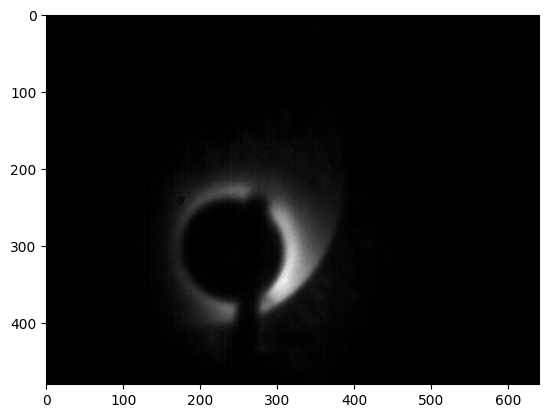

In [4]:
plt.imshow(data[0].reshape((480, 640)),cmap='gray')

In [58]:
images=[]
for k in range(len(data)):
  images.append(data[k].reshape((480, 640)))

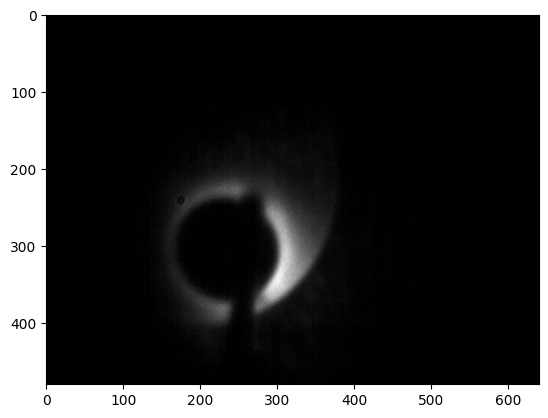

In [52]:
plt.imshow(images[1],cmap='gray')

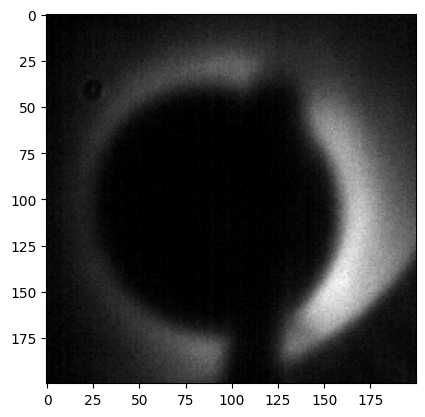

In [77]:
template = images[0][200:400, 150:350]
#template = images[1][230:250, 165:185]
plt.imshow(template,cmap='gray')
#np.save('/content/drive/MyDrive/template_image.npy', template)

In [72]:
h, w = template.shape

location_list = []

for i in range(len(images)):
  img2 = images[i].copy()

  result = cv2.matchTemplate(img2, template, cv2.TM_SQDIFF)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

  location_list.append(min_loc)

In [73]:
len(location_list)

1000

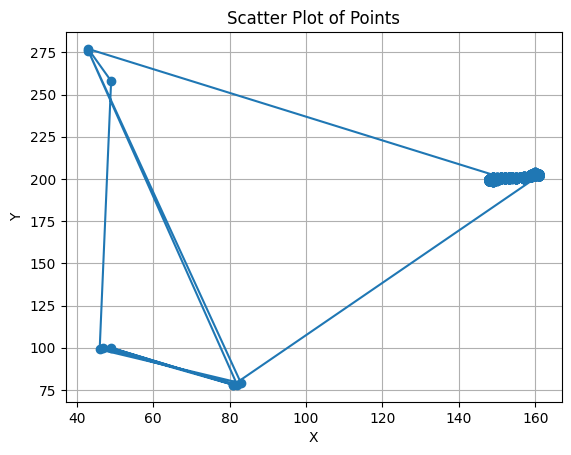

In [74]:
# Extract x and y coordinates from the list of tuples
x_coords = [point[0] for point in location_list]
y_coords = [point[1] for point in location_list]

# Plot the points
plt.plot(x_coords, y_coords, marker='o')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Points')

# Show the plot
plt.grid(True)
plt.show()
